In [1]:
# Laptop Price Prediction using Random Forest Tree Regressor
import pandas as pd
import numpy as np
import re as re

#Loading library and dataset

laptop_df_path = '/Users/purnimagebhardt/Desktop/laptop_price.csv'
laptop_df = pd.read_csv(laptop_df_path)
laptop_dfcopy = laptop_df.copy() 

laptop_dfcopy

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1
...,...,...,...,...,...,...,...,...,...,...
545,545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9
546,546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9
547,547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5
548,548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5


In [4]:
###EDA and Data Cleaning
#removing the Unnamed column
laptop_dfcopy.drop(laptop_dfcopy.columns[laptop_dfcopy.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
laptop_dfcopy.head()
# laptop_df.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [6]:
# Dropping of the Rupee symbol and comma from the price column 
laptop_dfcopy['Price'] = laptop_dfcopy['Price'].str.replace(',', '')
laptop_dfcopy['Price'] = laptop_dfcopy['Price'].str.replace('₹', '')
#laptop_dfcopy

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1
...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,136990,4.9
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,37900,3.9
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,109990,3.5
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,122000,4.5


In [7]:
## Deletion of text from various columns

# removing the text the from the all rows of the ram column.
# so that we can treat it as number data.
laptop_dfcopy["RAM"] = laptop_dfcopy.RAM.str.replace('\s.*','')

# # removing the text the from the all rows of the Warranty column.
# # so that we can treat it as number data.
laptop_dfcopy["Warranty"] = laptop_dfcopy.Warranty.str.replace('\s.*','')
# #df.head()

# droping irrelevant column such as operating system. Becuase it is same for every laptop.
# droping rating becuase it is no where correlated with price.

laptop_dfcopy.drop(['rating', 'Operating System'], axis = 1, inplace = True)


#price datatype conversion
laptop_dfcopy["Price"] = laptop_dfcopy["Price"].astype(str).astype(int)
print(laptop_dfcopy.dtypes)

# making storage into its values in GB
laptop_dfcopy['Storage'] = laptop_dfcopy['Storage'].replace('1 TB', '1024 GB', regex=True)
laptop_dfcopy


Name         object
Processor    object
RAM          object
Storage      object
Display      object
Warranty     object
Price         int64
dtype: object


/var/folders/xs/txmlyp8s5pnc4_kyzdnjn9980000gn/T/ipykernel_27446/529503990.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_dfcopy["RAM"] = laptop_dfcopy.RAM.str.replace('\s.*','')
/var/folders/xs/txmlyp8s5pnc4_kyzdnjn9980000gn/T/ipykernel_27446/529503990.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_dfcopy["Warranty"] = laptop_dfcopy.Warranty.str.replace('\s.*','')


,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,1024 GB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,1024 GB HDD,39.62 cm (15.6 inch) Display,1,27490
...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1,136990
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,1024 GB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1,37900
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,1024 GB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1,109990
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,512 GB SSD,39.62 cm (15.6 inch) Display,1,122000


In [10]:
##ENCODING-use to deal with the categorical variable without which it is not feasible to train categorical data

column = [Predictor for Predictor in laptop_dfcopy.columns if laptop_dfcopy[Predictor].dtype == 'O']
for Predictor in column:
    labels_ordered= laptop_dfcopy.groupby([Predictor])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    laptop_dfcopy[Predictor]=laptop_dfcopy[Predictor].map(labels_ordered)
#laptop_dfcopy.head(10)


In [12]:
#seprating target variable from features
#Target
y= laptop_dfcopy['Price']
#features 
X = laptop_dfcopy.drop(columns='Price')

In [14]:
#standardising features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # setting with_mean False, is for a reason !

a = scaler.fit_transform(X)
X = pd.DataFrame(a)

In [16]:
#Splitting of Dataset into Training and Validation groups
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,shuffle = True)

In [25]:
# Training the Model Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
Random_forest_regressor = RandomForestRegressor(random_state=10,n_estimators=100)
Random_forest_regressor.fit(X_train,y_train)


RandomForestRegressor(random_state=10)

In [19]:
##Efficiency Test
print("Training score")
print(Random_forest_regressor.score(X_train,y_train))
print('\r')
print("Testing score")
print(Random_forest_regressor.score(X_test,y_test))

Training score
0.998378156909143

Testing score
0.9900032033608583


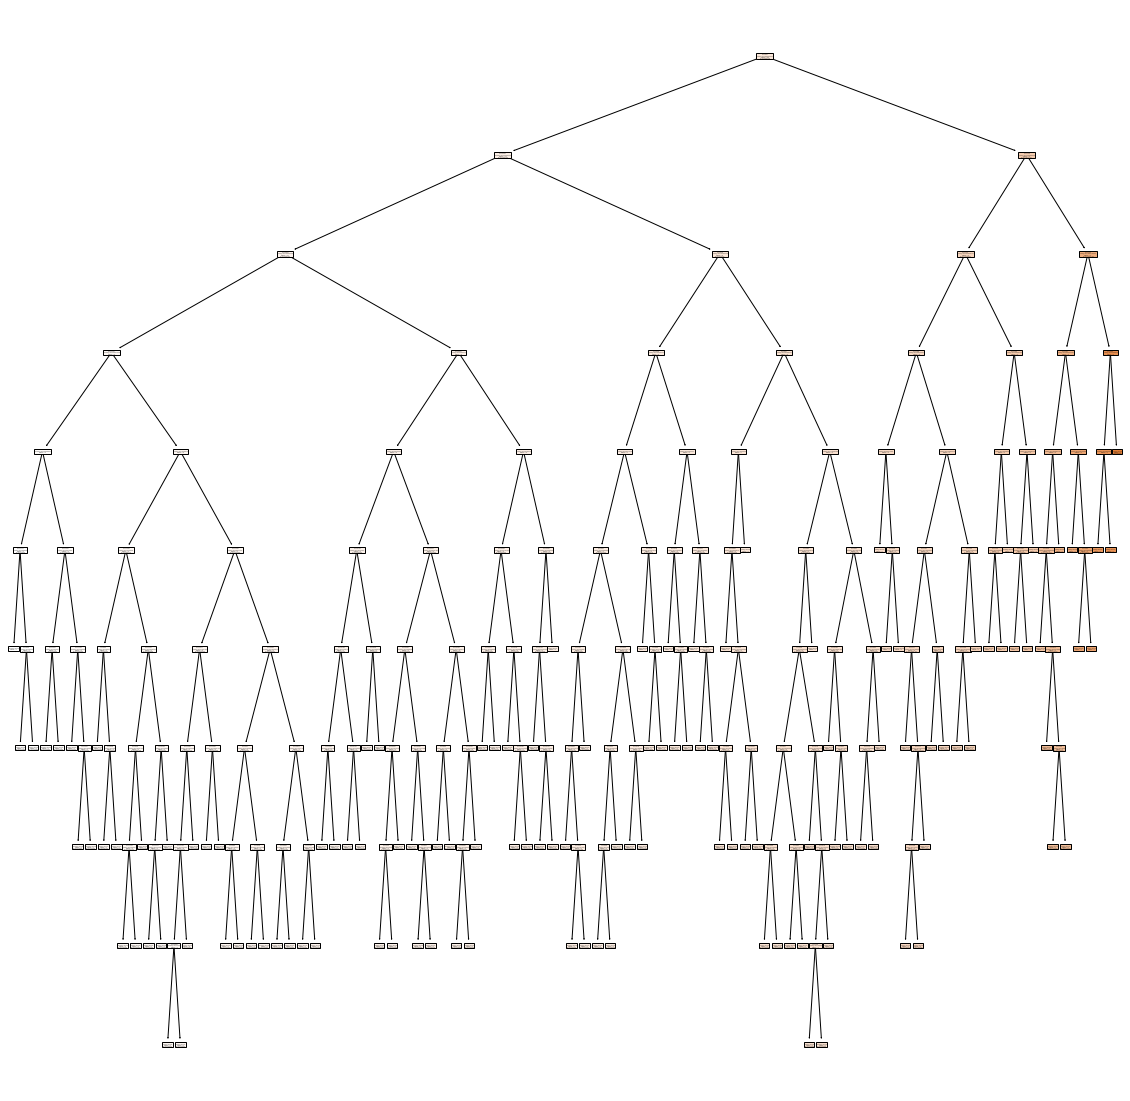

In [44]:
# will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn import tree
plt.rcParams.update({'figure.figsize': (14.0, 8.0)})
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,20))
#plotting first Decision Tree from the Random Forest (with index 0 in the list):
_ = tree.plot_tree(Random_forest_regressor.estimators_[0], feature_names=X.columns, filled=True)

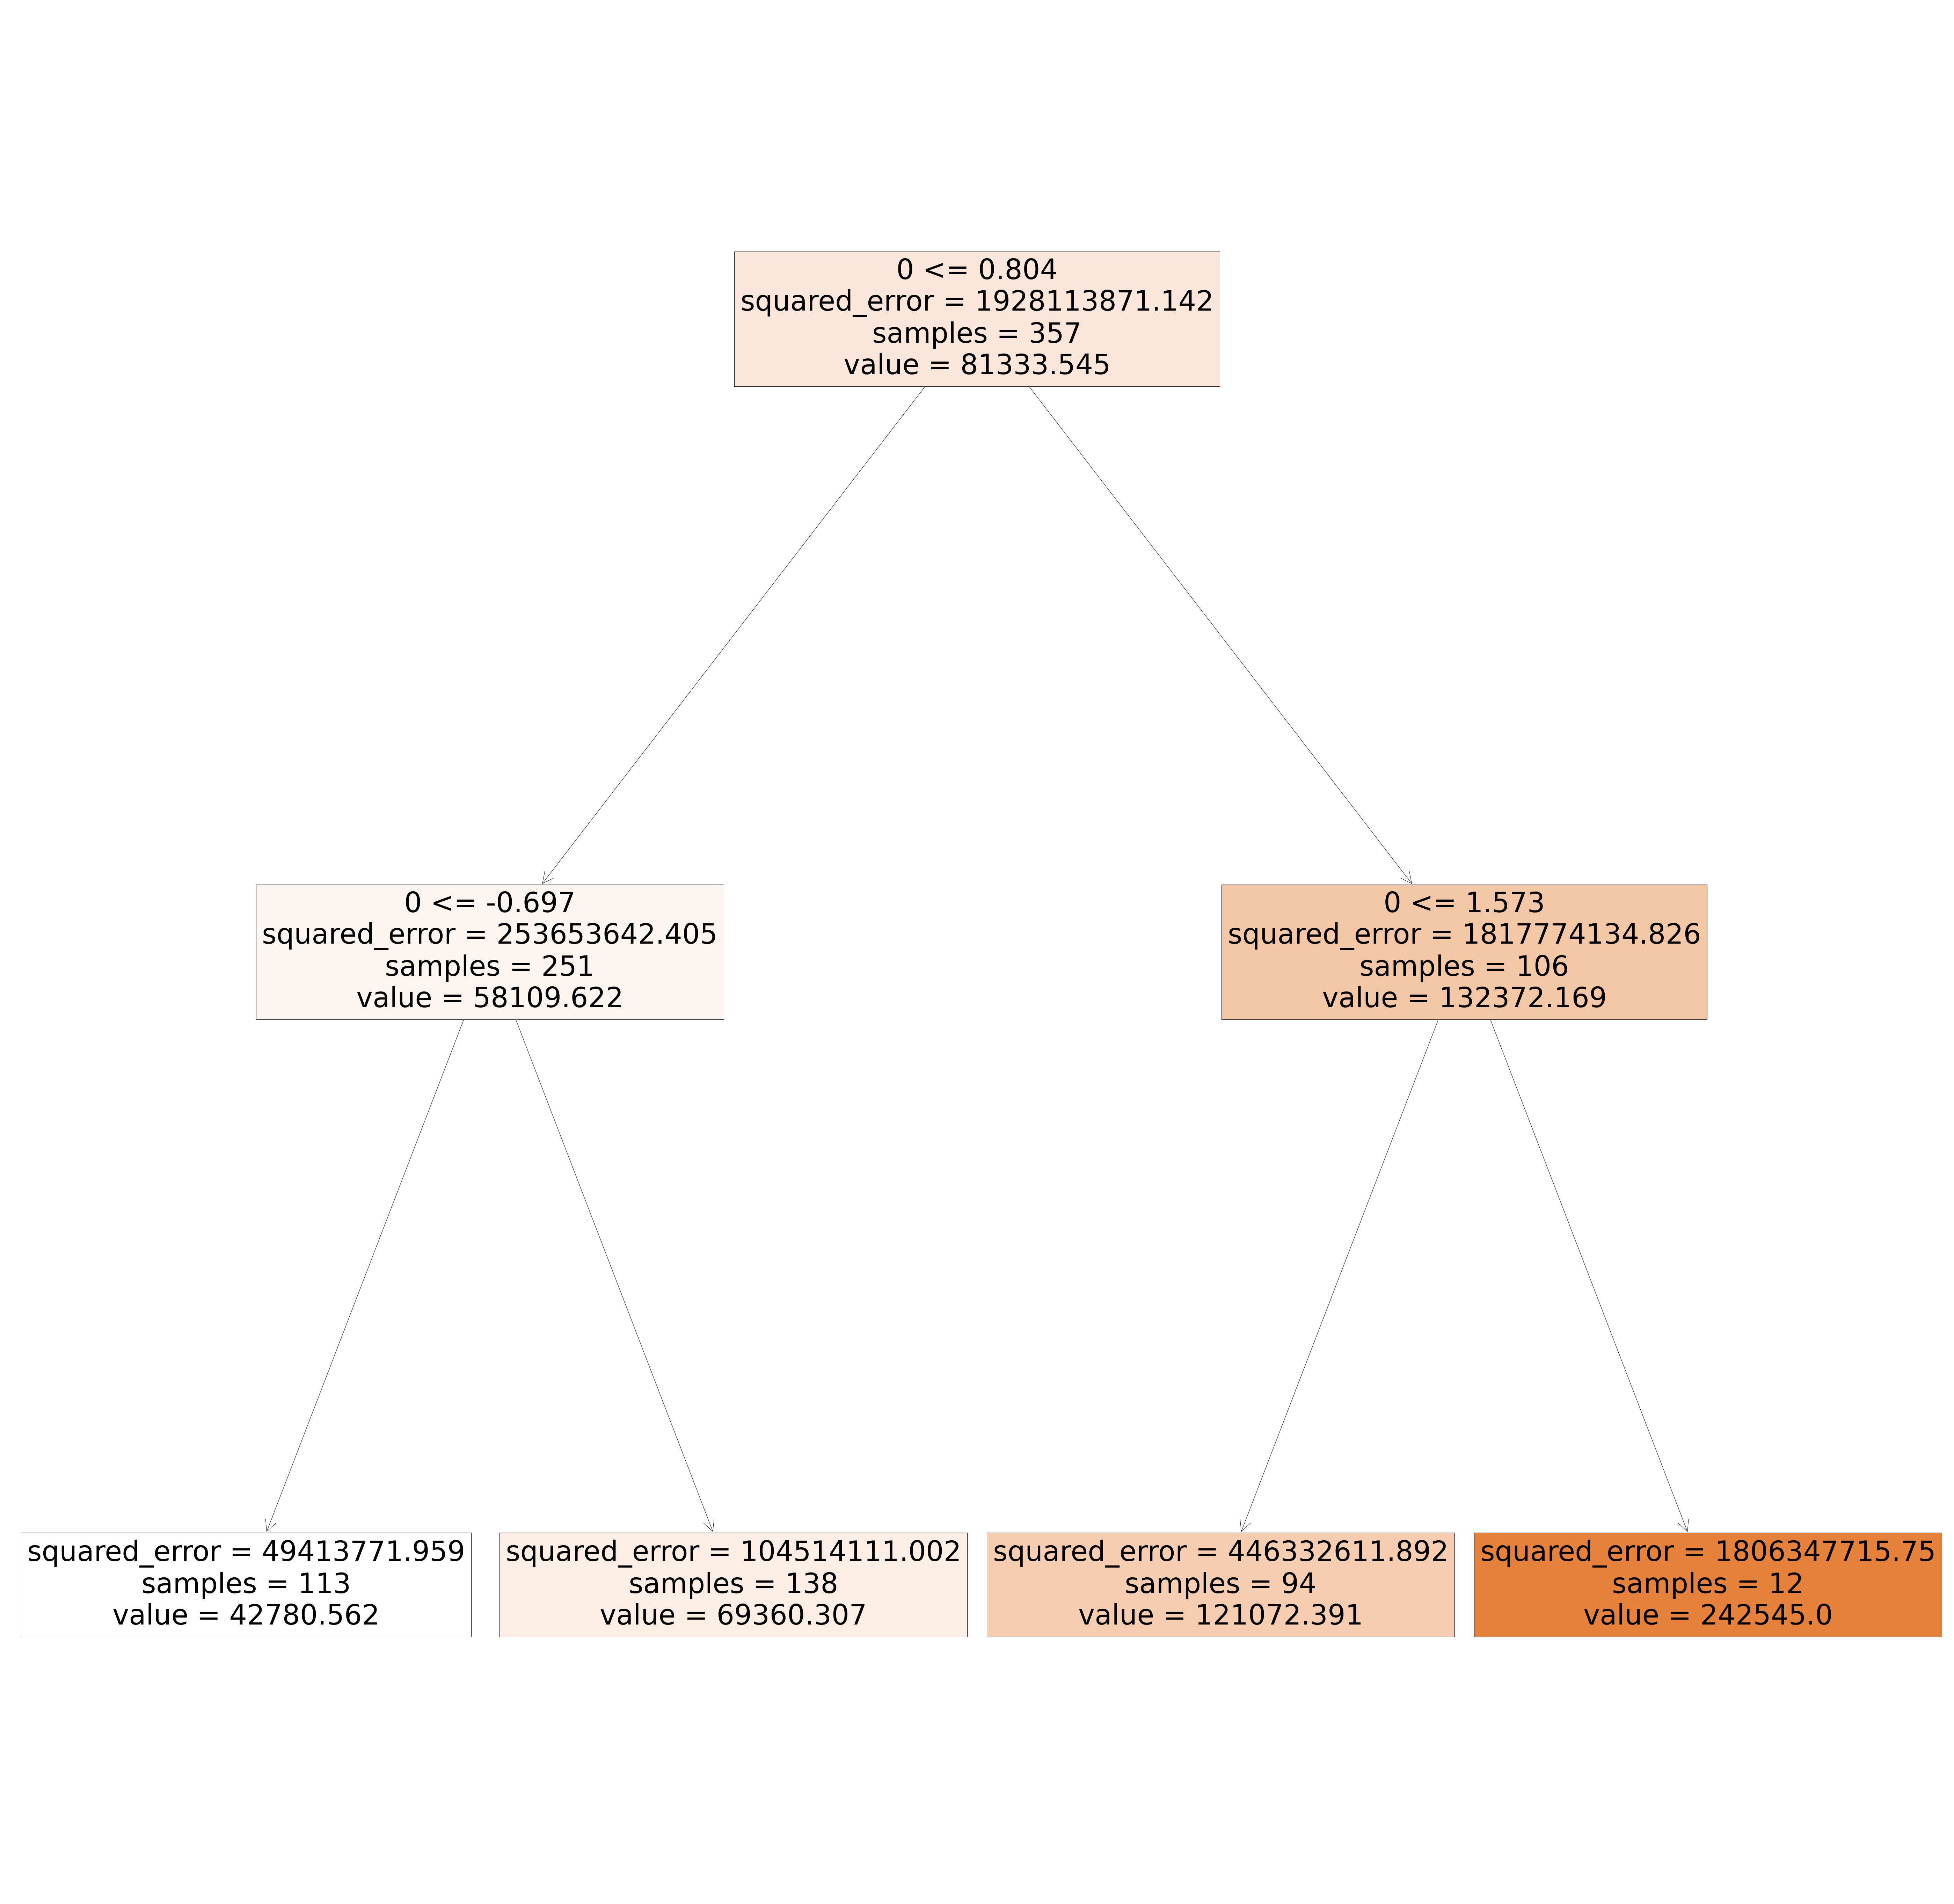

In [48]:
rf = RandomForestRegressor(n_estimators=100, max_depth=2)
rf.fit(X, y)
plt.figure(figsize=(100,100))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)